## 1. Importação das Bibliotecas
Importa todas as bibliotecas necessárias para o projeto

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

## 2. Carregamento e Exploração Inicial do Dataset
Carrega o dataset `pix.csv` e realiza uma exploração inicial para entender a estrutura dos dados, incluindo visualização das primeiras linhas, informações sobre colunas e estatísticas descritivas.

In [6]:
df = pd.read_csv('pix.csv', sep=';')

print("Primeiras 5 linhas do dataset:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

Primeiras 5 linhas do dataset:
                             EndToEndId             DataHora    Valor Moeda  \
0  f094cb2c-2a73-463c-b60e-0c57262051e4  2025-06-26 21:07:56  4658.86   BRL   
1  f0409769-741f-49bd-811a-3842cc8f54db  2025-06-23 17:47:56  3184.72   BRL   
2  c1d22287-d343-4c91-b03d-dbe9a69695b3  2025-06-27 15:58:56  1054.48   BRL   
3  254423a9-50b7-41b1-a099-e8cf6232bab4  2025-07-15 13:59:56  3564.76   BRL   
4  f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59  2025-06-23 06:19:56    15.16   BRL   

           Pagador_Nome    Pagador_CPF_CNPJ     Pagador_Banco  \
0        Nathan Cardoso  13.253.967/0001-95       BTG Pactual   
1       Benjamin Barros      781.515.544-64   Banco do Brasil   
2          Lorena Cunha      444.922.709-96       Banco Inter   
3      Sra. Luana Pinto      468.153.904-62       Banco Safra   
4  João Miguel da Cunha  83.407.726/0001-68  Santander Brasil   

         Recebedor_Nome  Recebedor_CPF_CNPJ          Recebedor_Banco  \
0     Ana Beatriz Ramos      90

## 3. Pré-processamento: Tratamento de Valores Nulos e Categóricas
Verifica e trata valores nulos (se houver) e converte colunas categóricas em variáveis dummy para preparar o dataset para modelagem.

In [7]:
print("\nValores nulos por coluna:")
print(df.isnull().sum())

df['Valor'].fillna(df['Valor'].mean(), inplace=True)

categorical_columns = ['Moeda', 'Pagador_Nome', 'Pagador_CPF_CNPJ', 'Pagador_Banco',
                      'Recebedor_Nome', 'Recebedor_CPF_CNPJ', 'Recebedor_Banco',
                      'ChavePix_Utilizada', 'TipoChave', 'Descricao', 'Status']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

dummy_columns = ['Moeda', 'Pagador_Banco', 'Recebedor_Banco', 'TipoChave', 'Status']
df = pd.get_dummies(df, columns=dummy_columns, drop_first=True)


Valores nulos por coluna:
EndToEndId            0
DataHora              0
Valor                 0
Moeda                 0
Pagador_Nome          0
Pagador_CPF_CNPJ      0
Pagador_Banco         0
Recebedor_Nome        0
Recebedor_CPF_CNPJ    0
Recebedor_Banco       0
ChavePix_Utilizada    0
TipoChave             0
Descricao             0
Status                0
Anomalia              0
dtype: int64


/tmp/ipython-input-152646886.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Valor'].fillna(df['Valor'].mean(), inplace=True)
/tmp/ipython-input-152646886.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

## 4. Separação dos Dados e Divisão em Treino/Teste
Separa as variáveis independentes (X) e a variável alvo (y), e divide o dataset em conjuntos de treino (80%) e teste (20%).

In [8]:
X = df.drop(['Anomalia', 'EndToEndId', 'DataHora', 'Pagador_Nome',
             'Pagador_CPF_CNPJ', 'Recebedor_Nome', 'Recebedor_CPF_CNPJ',
             'ChavePix_Utilizada', 'Descricao'], axis=1)
y = df['Anomalia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (8000, 30)
Tamanho do conjunto de teste: (2000, 30)


## 5. Treinamento e Avaliação dos Modelos
Treina três modelos de classificação (DecisionTree, KNeighbors, LogisticRegression) e avalia cada um com acurácia, F1-Score e matriz de confusão.

In [9]:
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {'Model': [], 'Accuracy': [], 'F1-Score': []}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1-Score'].append(f1)

    print(f"\nResultados para {name}:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Matriz de Confusão:\n{cm}")


Resultados para DecisionTree:
Acurácia: 0.9845
F1-Score: 0.3673
Matriz de Confusão:
[[1960   13]
 [  18    9]]

Resultados para KNeighbors:
Acurácia: 0.9895
F1-Score: 0.3636
Matriz de Confusão:
[[1973    0]
 [  21    6]]

Resultados para LogisticRegression:
Acurácia: 0.9880
F1-Score: 0.2000
Matriz de Confusão:
[[1973    0]
 [  24    3]]


## 6. Visualização: Comparação de Acurácia dos Modelos
Gera um gráfico de barras comparando as acurácias dos três modelos.

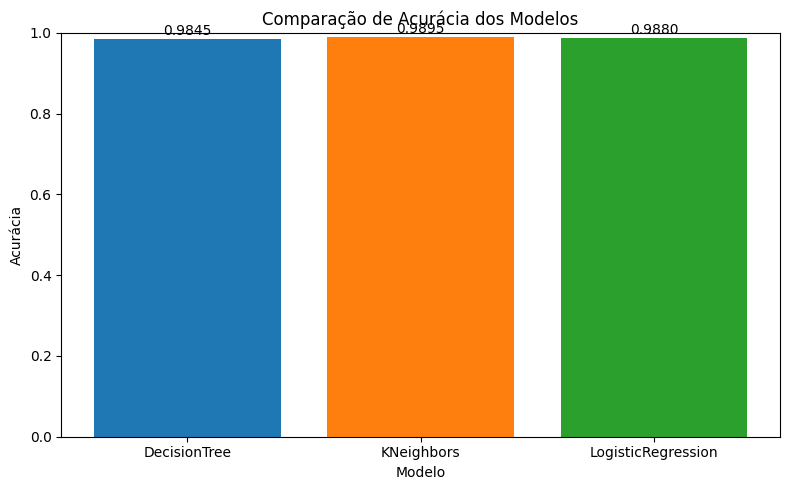

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['Accuracy'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Comparação de Acurácia dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()

1 - Qual modelo apresentou melhor desempenho no dataset escolhido?

O KNeighborsClassifier teve o melhor desempenho, com a maior acurácia (0.9895) e um F1-Score (0.3636) próximo ao da DecisionTree, mas sem falsos positivos, o que indica maior precisão.

2 - O resultado faz sentido?

Sim, faz sentido. O dataset é muito desbalanceado (apenas 1% de fraudes, Anomalia=1). Isso faz com que todos os modelos tenham alta acurácia, pois acertam facilmente a classe majoritária (Anomalia=0). O KNeighborsClassifier se saiu melhor por identificar algumas fraudes sem erros de falsos positivos, enquanto os outros modelos tiveram mais dificuldade com a classe minoritária.

3 - O que poderia ser feito para melhorar os modelos?

Normalizar Valor, extrair features de DataHora, ajustar hiperparâmetros e usar SMOTE para balancear as classes.